In [ ]:
class Cartoonizer:
"""Cartoonizer effect
A class that applies a cartoon effect to an image.
The class uses a bilateral filter and adaptive thresholding to create
a cartoon effect.
"""
  def __init__(self):
    pass

  def render(self, img_rgb):
    img_rgb = cv2.imread(img_rgb)
    img_rgb = cv2.resize(img_rgb, (1366,768))
    numDownSamples = 2 # number of downscaling steps
    numBilateralFilters = 50 # number of bilateral filtering steps

    # -- STEP 1 --

    # downsample image using Gaussian pyramid
    img_color = img_rgb
    for _ in range(numDownSamples):
     img_color = cv2.pyrDown(img_color)

    #cv2.imshow("downcolor",img_color)
    #cv2.waitKey(0)
    # repeatedly apply small bilateral filter instead of applying
    # one large filter
    for _ in range(numBilateralFilters):
     img_color = cv2.bilateralFilter(img_color, 9, 9, 7)

    #cv2.imshow("bilateral filter",img_color)
    #cv2.waitKey(0)
    # upsample image to original size
    for _ in range(numDownSamples):
     img_color = cv2.pyrUp(img_color)
    #cv2.imshow("upscaling",img_color)
    #cv2.waitKey(0)

    # -- STEPS 2 and 3 --
    # convert to grayscale and apply median blur
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    img_blur = cv2.medianBlur(img_gray, 3)
    #cv2.imshow("grayscale+median blur",img_color)
    #cv2.waitKey(0)

    # -- STEP 4 --
    # detect and enhance edges
    img_edge = cv2.adaptiveThreshold(img_blur, 255,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY, 9, 2)
    #cv2.imshow("edge",img_edge)
    #cv2.waitKey(0)

    # -- STEP 5 --
    # convert back to color so that it can be bit-ANDed with color image
    (x,y,z) = img_color.shape
    img_edge = cv2.resize(img_edge,(y,x))
    img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
    cv2.imwrite("edge.png",img_edge)
    #cv2.imshow("step 5", img_edge)
    #cv2.waitKey(0)
    #img_edge = cv2.resize(img_edge,(i for i in img_color.shape[:2]))
    #print img_edge.shape, img_color.shape
    return cv2.bitwise_and(img_color, img_edge)

tmp_canvas = Cartoonizer()

file_name = "Screenshot.png" #File_name will come here
res = tmp_canvas.render(file_name)

cv2.imwrite("Cartoon version.jpg", res)
cv2.imshow("Cartoon version", res)
cv2.waitKey(0)
cv2.destroyAllWindows()


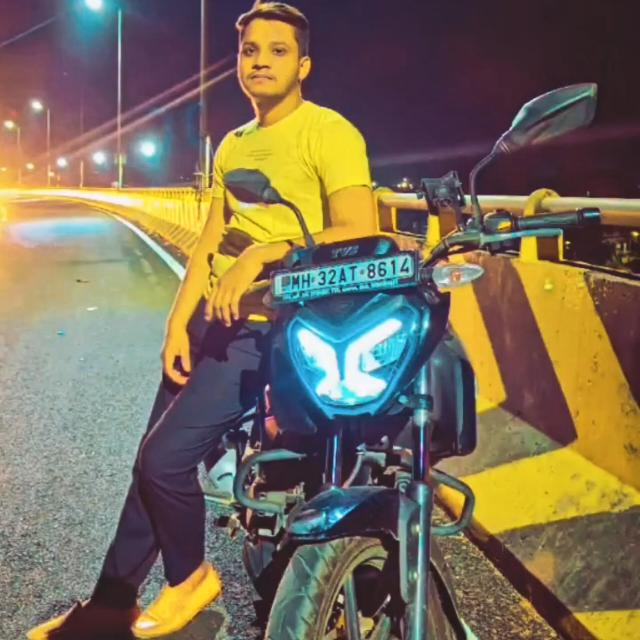

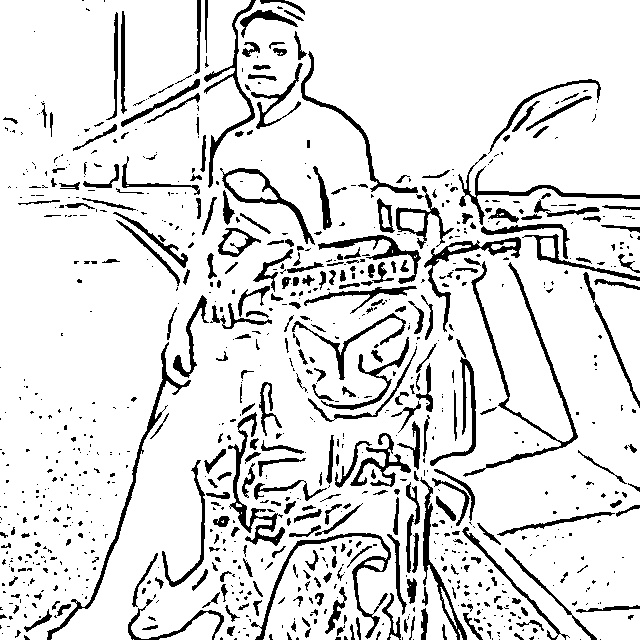

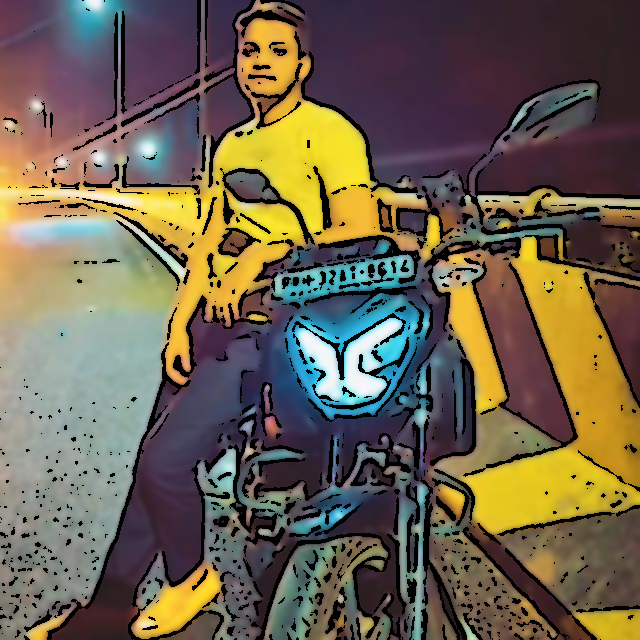

In [33]:
# importing libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


# reading image
img = cv2.imread("/content/file.enc")

# Edges
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
		cv2.THRESH_BINARY, 9, 9)

# Cartoonization
color = cv2.bilateralFilter(img, 9, 250, 250)
cartoon = cv2.bitwise_and(color, color, mask=edges)


cv2_imshow(img)
cv2_imshow(edges)
cv2_imshow(cartoon)
cv2.waitKey(0)
cv2.destroyAllWindows()
